with God's blessing 
and https://www.quantopian.com/posts/the-efficient-frontier-markowitz-portfolio-optimization-in-python

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import finance_scripts as fs
from scipy.optimize import minimize
from cvxopt import blas, solvers  
import cvxopt as opt  
import importlib

solvers.options['show_progress'] = False 

In [332]:
# fs.init()
importlib.reload(fs)

<module 'finance_scripts' from '/home/friday/_homescript/finance/lab2/Finance/finance_scripts.py'>

In [2]:
dClosed = pd.read_pickle("close_cleared.pickle") #  цены закрытия
dVolume = pd.read_pickle("volume_cleared.pickle") #  объёмы продаж
print(dClosed.shape[1]) # Число исследуемых компаний

73


In [3]:
logR = np.log(dClosed / dClosed.shift(1))
e = datetime.strptime('2017-01-02', '%Y-%m-%d')
logR = logR.drop(e)

In [4]:
portfolio_num = 10
portfolio_stocks = logR.columns[:portfolio_num]
portfolio_R=logR[portfolio_stocks]

### Article usage begins ...

<br>Функция *random_portfolio()* для генерации случайного портфеля, возвращает среднее значение доходности  и стандартное отклонение доходности $\sigma$ портфеля.

Среднее значение расчитывается как взвешенное средних активов, входящий в портфель: 
$\mu=p^\intercal x$, где 
- $x = (x_1, ..., x_n)$ - вектор весов, полученный с помощью функции rand_weights()
- $p$ - вектор средних доходностей активов в портфеле

Стандартное отклонение расчитывается как $\sigma=\sqrt{x^\intercal Cx}$, где
- $C$ - ковариационная матрица доходностей

In [173]:
mu, sigma = fs.random_portfolio(portfolio_R)
print(f'mu = {mu}, sigma = {sigma}')

mu = 0.00040982423604408834, sigma = 0.006591433020191423


In [175]:
n_portfolios = 10000
means, stds = np.column_stack([  
    fs.random_portfolio(portfolio_R) for _ in range(n_portfolios)
])

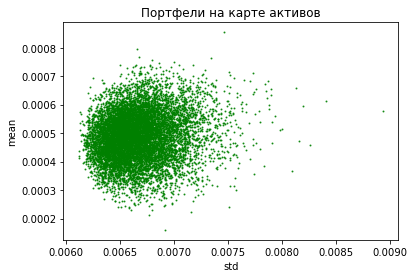

In [176]:
plt.plot(stds, means, 'o', markersize=1, alpha=0.8, color='g')  
plt.xlabel('std')  
plt.ylabel('mean')  
plt.title('Портфели на карте активов')  
plt.show()

## Хотим минимизировать риск портфелей

In [293]:
R_mean = np.mean(portfolio_R, axis=0).values 
C = np.cov(portfolio_R.values.T)
target_R = np.arange(0,0.0011,0.00001)
efficient_portfolios_sol = fs.efficient_frontier(R_mean, C, target_R)

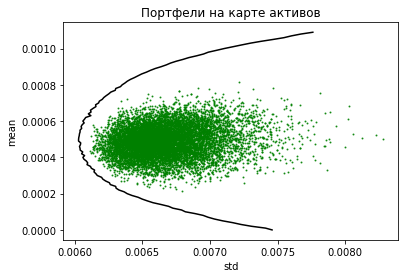

In [294]:
n_portfolios = 10000
means, stds = np.column_stack([  
    fs.random_portfolio(portfolio_R) for _ in range(n_portfolios)
])
plt.plot(stds, means, 'o', markersize=1, alpha=0.8, color='g') 

plt.plot(  efficient_portfolios_sol.T[0], efficient_portfolios_sol.T[1], linestyle='-', color='black', label='efficient frontier')
plt.xlabel('std')  
plt.ylabel('mean')  
plt.title('Портфели на карте активов')  
plt.show()

## Эффективный портфель

$u(\sigma, E) = E-\gamma\sigma \rightarrow max$ - utility function

Из обоснования мы получили, что решение задачи с соответствующим $\gamma$ будет соответствовать точке на эффективном фронте. При этом меня $-\infty < \gamma < \infty$ мы получим все точки эффетивного фронта

In [338]:
gms = [0, 0.001, 0.1, 0.5, 1]
opts = fs.optimal_portfolios(R_mean, C, gms)

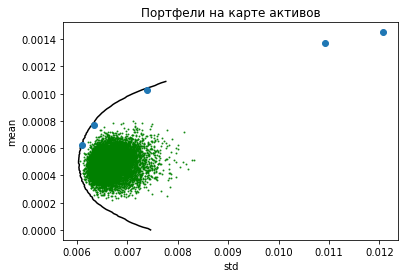

In [339]:
n_portfolios = 10000
means, stds = np.column_stack([  
    fs.random_portfolio(portfolio_R) for _ in range(n_portfolios)
])
plt.plot(stds, means, 'o', markersize=1, alpha=0.8, color='g') 

plt.plot(  efficient_portfolios_sol.T[0], efficient_portfolios_sol.T[1], linestyle='-', color='black', label='efficient frontier')
plt.plot(  opts.T[0], opts.T[1], 'o', label='optimal portfolio')
# opts
# plt.plot(fs.portfolio_std(portfolio.x,C), fs.portfolio_return(portfolio.x,R_mean),'o')
plt.xlabel('std')  
plt.ylabel('mean')  
plt.title('Портфели на карте активов')  
plt.show()